In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

C:\Users\biltu.khawas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
####################IMPORT THE DATABASE

columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']
train = pd.read_csv('../AssignmentSolution/classic_adult_dataset/adult-training.csv', names=columns)
test = pd.read_csv('../AssignmentSolution/classic_adult_dataset/adult-test.csv', names=columns, skiprows=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
####################Clean the Data

df = pd.concat([train, test], axis=0)
dff=df
k=df

df['Income'] = df['Income'].apply(lambda x: 1 if x==' >50K' else 0)

for col in df.columns:
    if type(df[col][0]) == str:
        print("Working on " + col)
        df[col] = df[col].apply(lambda val: val.replace(" ",""))

In [5]:
####################REMOVE UNKNOWNS
df.replace(' ?', np.nan, inplace=True)###making copy for visualization

In [6]:
#################### Converting to int

df = pd.concat([df, pd.get_dummies(df['Workclass'],prefix='Workclass',prefix_sep=':')], axis=1)
df.drop('Workclass',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Marital Status'],prefix='Marital Status',prefix_sep=':')], axis=1)
df.drop('Marital Status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Occupation'],prefix='Occupation',prefix_sep=':')], axis=1)
df.drop('Occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Relationship'],prefix='Relationship',prefix_sep=':')], axis=1)
df.drop('Relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Race'],prefix='Race',prefix_sep=':')], axis=1)
df.drop('Race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Sex'],prefix='Sex',prefix_sep=':')], axis=1)
df.drop('Sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Native country'],prefix='Native country',prefix_sep=':')], axis=1)
df.drop('Native country',axis=1,inplace=True)

df.drop('Education', axis=1,inplace=True)

df.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Never-worked,...,Native country: Portugal,Native country: Puerto-Rico,Native country: Scotland,Native country: South,Native country: Taiwan,Native country: Thailand,Native country: Trinadad&Tobago,Native country: United-States,Native country: Vietnam,Native country: Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


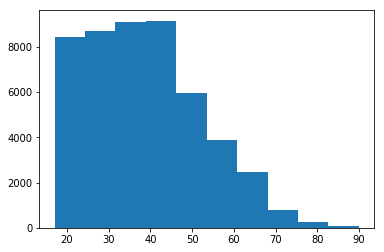

In [7]:
######################## Visualizations #############################
########################################### VISULIZATION ##################################################
###########################################################################################################
###########################################################################################################

plt.hist(dff['Age']);

dff['Income'] = dff['Income'].apply(lambda x: 1 if x==' >50K.' else 0)

dff.replace(' ?', np.nan, inplace=True)

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 0                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: Workclass, dtype: int64

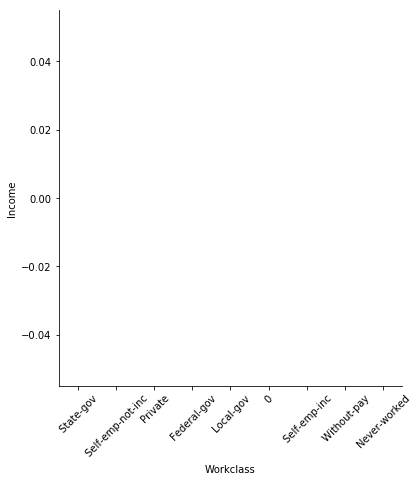

In [8]:
###################################  WORKCLASS
dff.fillna(' 0', inplace=True)

sn.factorplot(x="Workclass", y="Income", data=dff, kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);
dff['Workclass'].value_counts()

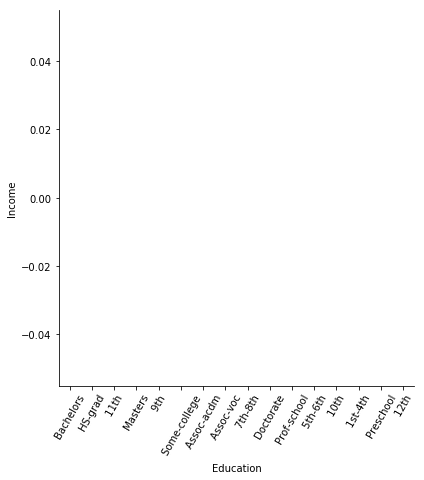

In [9]:
########################################### EDUCATION
sn.factorplot(x="Education",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

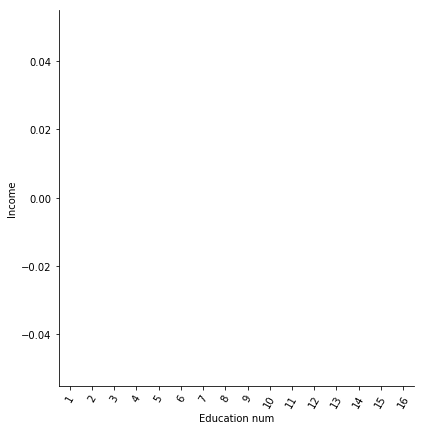

In [10]:
#########################  EDUCATION NO
sn.factorplot(x="Education num",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

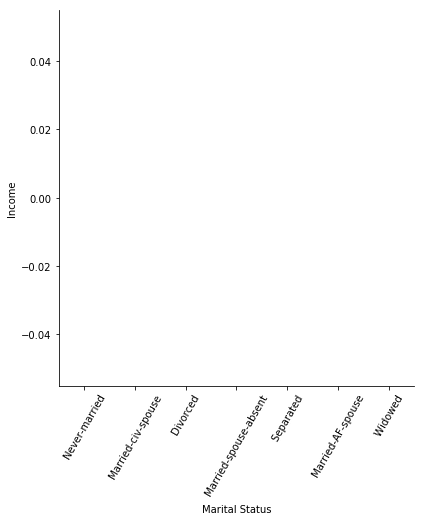

In [11]:
################################ MARITAL status
sn.factorplot(x="Marital Status",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

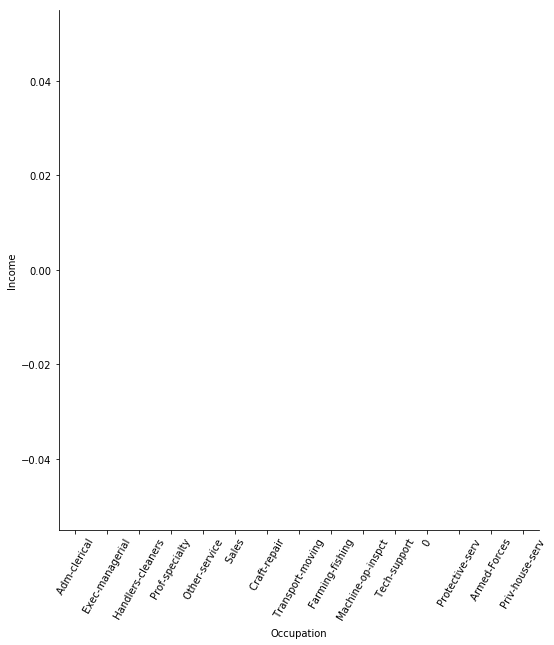

In [12]:
################################ OCCUPATION
sn.factorplot(x="Occupation",y="Income",data=dff,kind="bar", size = 8, 
palette = "muted")
plt.xticks(rotation=60);

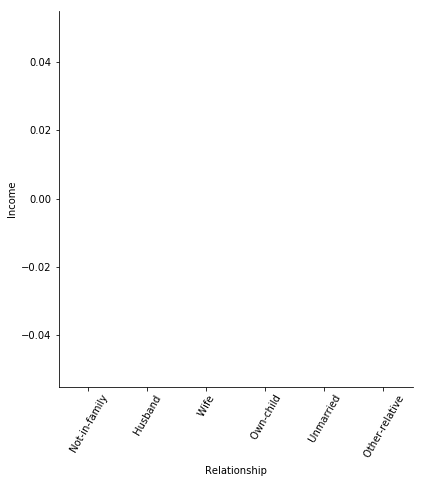

In [13]:
################################ Relationship
sn.factorplot(x="Relationship",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

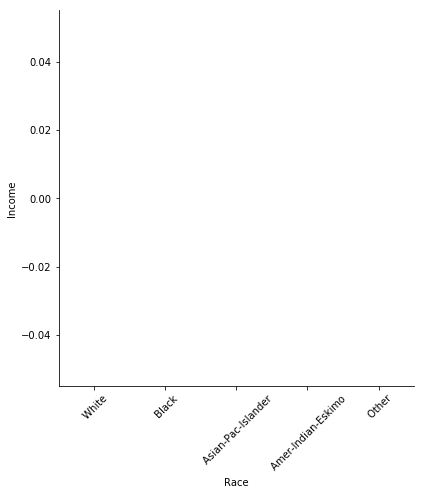

In [14]:
################################ RACE
sn.factorplot(x="Race",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);

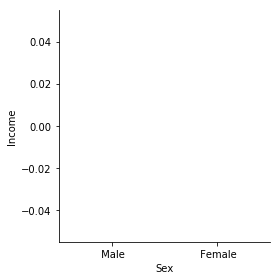

In [15]:
################################ SEX
sn.factorplot(x="Sex",y="Income",data=dff,kind="bar", size = 4, 
palette = "muted");

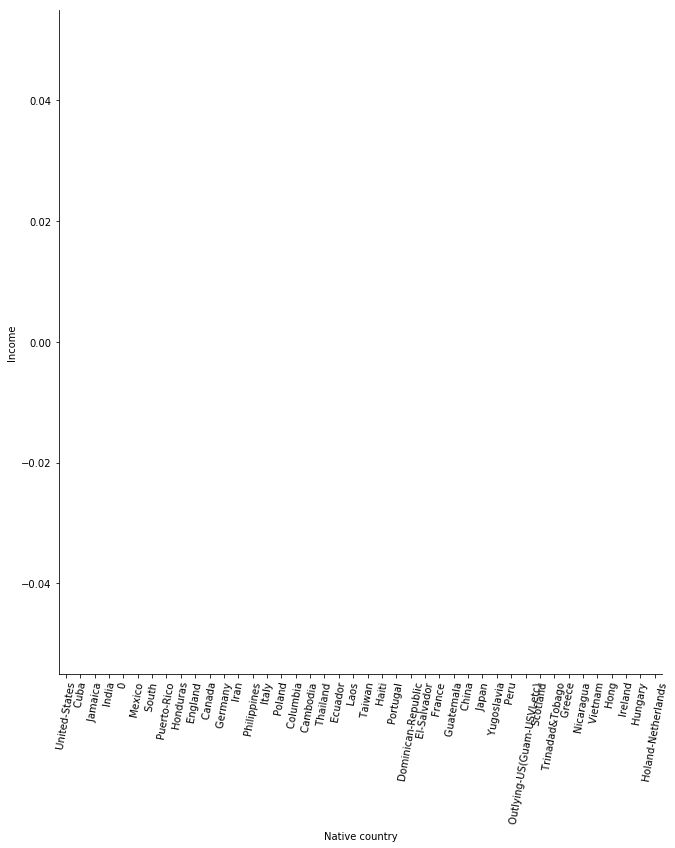

In [16]:
################################     Native county   
sn.factorplot(x="Native country",y="Income",data=dff,kind="bar", size = 10, 
palette = "muted")
plt.xticks(rotation=80);

In [17]:
########### Preparing data for Training and testing 

X = np.array(df.drop(['Income'], 1))
y = np.array(df['Income'])
X = preprocessing.scale(X)
y = np.array(df['Income'])

#Splitting data as train and test data 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

C:\Users\biltu.khawas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
################################CLASSIFICATION##################################################
####################################################################################
#########LOGISTIC REGRESSION######################################################

from sklearn.metrics import accuracy_score
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

lrn.fit(X_train, y_train)
y_pred = lrn.predict(X_test)

##########Results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LRA = accuracy_score(y_test, y_pred)
print("The Accuracy for Logistic Regression is {}".format(LRA))

Best: -0.292812 using {'learning_rate': 0.3}
-0.687341 (0.000049) with: {'learning_rate': 0.0001}
-0.639851 (0.000457) with: {'learning_rate': 0.001}
-0.412081 (0.002213) with: {'learning_rate': 0.01}
-0.297872 (0.002809) with: {'learning_rate': 0.1}
-0.294800 (0.003181) with: {'learning_rate': 0.2}
-0.292812 (0.003789) with: {'learning_rate': 0.3}


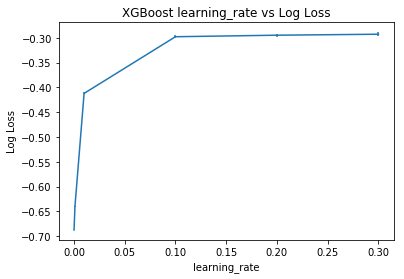

In [18]:
#######################XGB experiementing with learning rate
#This code is to let algorithm figure out itself, which value for learning rate is best 

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


 

from matplotlib import pyplot
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

Best: -0.291479 using {'learning_rate': 0.2, 'n_estimators': 300}
-0.687341 (0.000049) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.681648 (0.000097) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-0.676066 (0.000144) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-0.670593 (0.000191) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-0.665224 (0.000237) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-0.639851 (0.000457) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.595678 (0.000835) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.558613 (0.001157) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.527184 (0.001421) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.500377 (0.001645) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.412081 (0.002213) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.342459 (0.002295) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.320046 (0.002053) with: {'learning_rate': 0.01, 'n_e

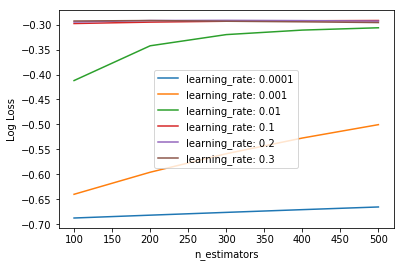

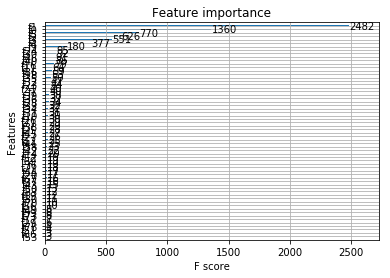

C:\Users\biltu.khawas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


training set auc: 0.8611935715016891
test set auc: 0.8611935715016891
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 4, 'missing': None, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}
The Accuracy  is 0.8611935715016891


C:\Users\biltu.khawas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
import numpy
from matplotlib import pyplot
from pandas import read_csv
from sklearn.metrics import accuracy_score

# grid search
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')

#The output for this line of code can be found at : https://tinyurl.com/y9js976p
#Learning rate graph can be found at : https://tinyurl.com/ycttuck3
############# XGboost - Picking the best values for learning rate and estimators  

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=5,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)
xgb.plot_importance(final_m)
plt.show()
predictions = model.predict(X_test)
print("training set auc:",accuracy_score(y_test, predictions))
predictions = model.predict(X_test)
print("test set auc:",accuracy_score(y_test, predictions))
print(model.get_params())

XGBA = accuracy_score(y_test, predictions)
print("The Accuracy  is {}".format(XGBA))